In [44]:
import re
import nltk
from nltk.tokenize import sent_tokenize
import spacy
from spacy import displacy
from termcolor import colored
from extraction import findSVOs
import en_core_web_lg
import networkx as nx
import matplotlib.pyplot as plt
from topic_modelling import get_topics
import time

nlp = en_core_web_lg.load()

In [45]:
colors = ['skyblue', 'red', 'yellow']

In [46]:
def create_graph(final_nodes, cnt):
    source = []
    target = []
    edge = []
    indexes = []

    for i in (range(len(final_nodes))):
        ent1 = (final_nodes[i][0])
        ent2 = (final_nodes[i][2])
        rel = final_nodes[i][1] 
        source.append(ent1.lower().strip())
        target.append(ent2.lower().strip())
        edge.append("".join(rel).strip())
        indexes.append(i)
    print("\nTotal number of extracted pairs:", len(edge))
    print("\nEdges: ", edge)
    print("\nEntities: ", final_nodes)
    if(len(edge)==0 or len(final_nodes)==0):
        print('False')
    else:
        G = nx.DiGraph(directed=True)
        for i in (range(len(edge))):
            G.add_weighted_edges_from([(source[i],target[i],i)])
        print("\nGraph generated")
        size=20
        if len(edge)/2 > 20:
            size = len(edge)/2
        plt.figure(figsize=(size,size))
        edge_labels=dict([((u,v,),edge[d['weight']]) for u,v,d in G.edges(data=True)])
        pos = nx.spring_layout(G,k=0.8)
        nx.draw(G, with_labels=True, node_color=colors[cnt], node_size=5000, edge_color='r', edge_cmap=plt.cm.Blues, pos=pos, font_size=20)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels, font_size=15)
        return G, edge_labels


Total number of extracted pairs: 12

Edges:  ['entered', 'revoked', 'consent', 'determine', 'determine', 'charged', 'obtained', 'enjoining', 'violating', 'pay', 'pay', 'pay']

Entities:  [('Judge Denise L. Cote of for', 'entered', 'a partial judgment'), ('The Commission', 'revoked', 'IIG registration'), ('a bifurcated settlement', 'consent', 'Hu'), ('the court', 'determine', 'an amount'), ('a later date upon motion of', 'determine', 'an amount'), ('The SEC', 'charged', 'IIG'), ('the SEC', 'obtained', 'a final judgment'), ('consent', 'enjoining', 'IIG'), ('consent', 'violating', 'the antifraud provisions of the federal securities laws'), ('consent', 'pay', 'IIG'), ('consent', 'pay', 'more than $ 35 million in disgorgement'), ('consent', 'pay', 'more than $ 35 million in')]

Graph generated

Total number of extracted pairs: 4

Edges:  ['orchestrated', 'sold', 'deceived', 'charges']

Entities:  [('Hu', 'orchestrated', 'multiple frauds on IIG investment advisory clients'), ('Hu', 'sold', 

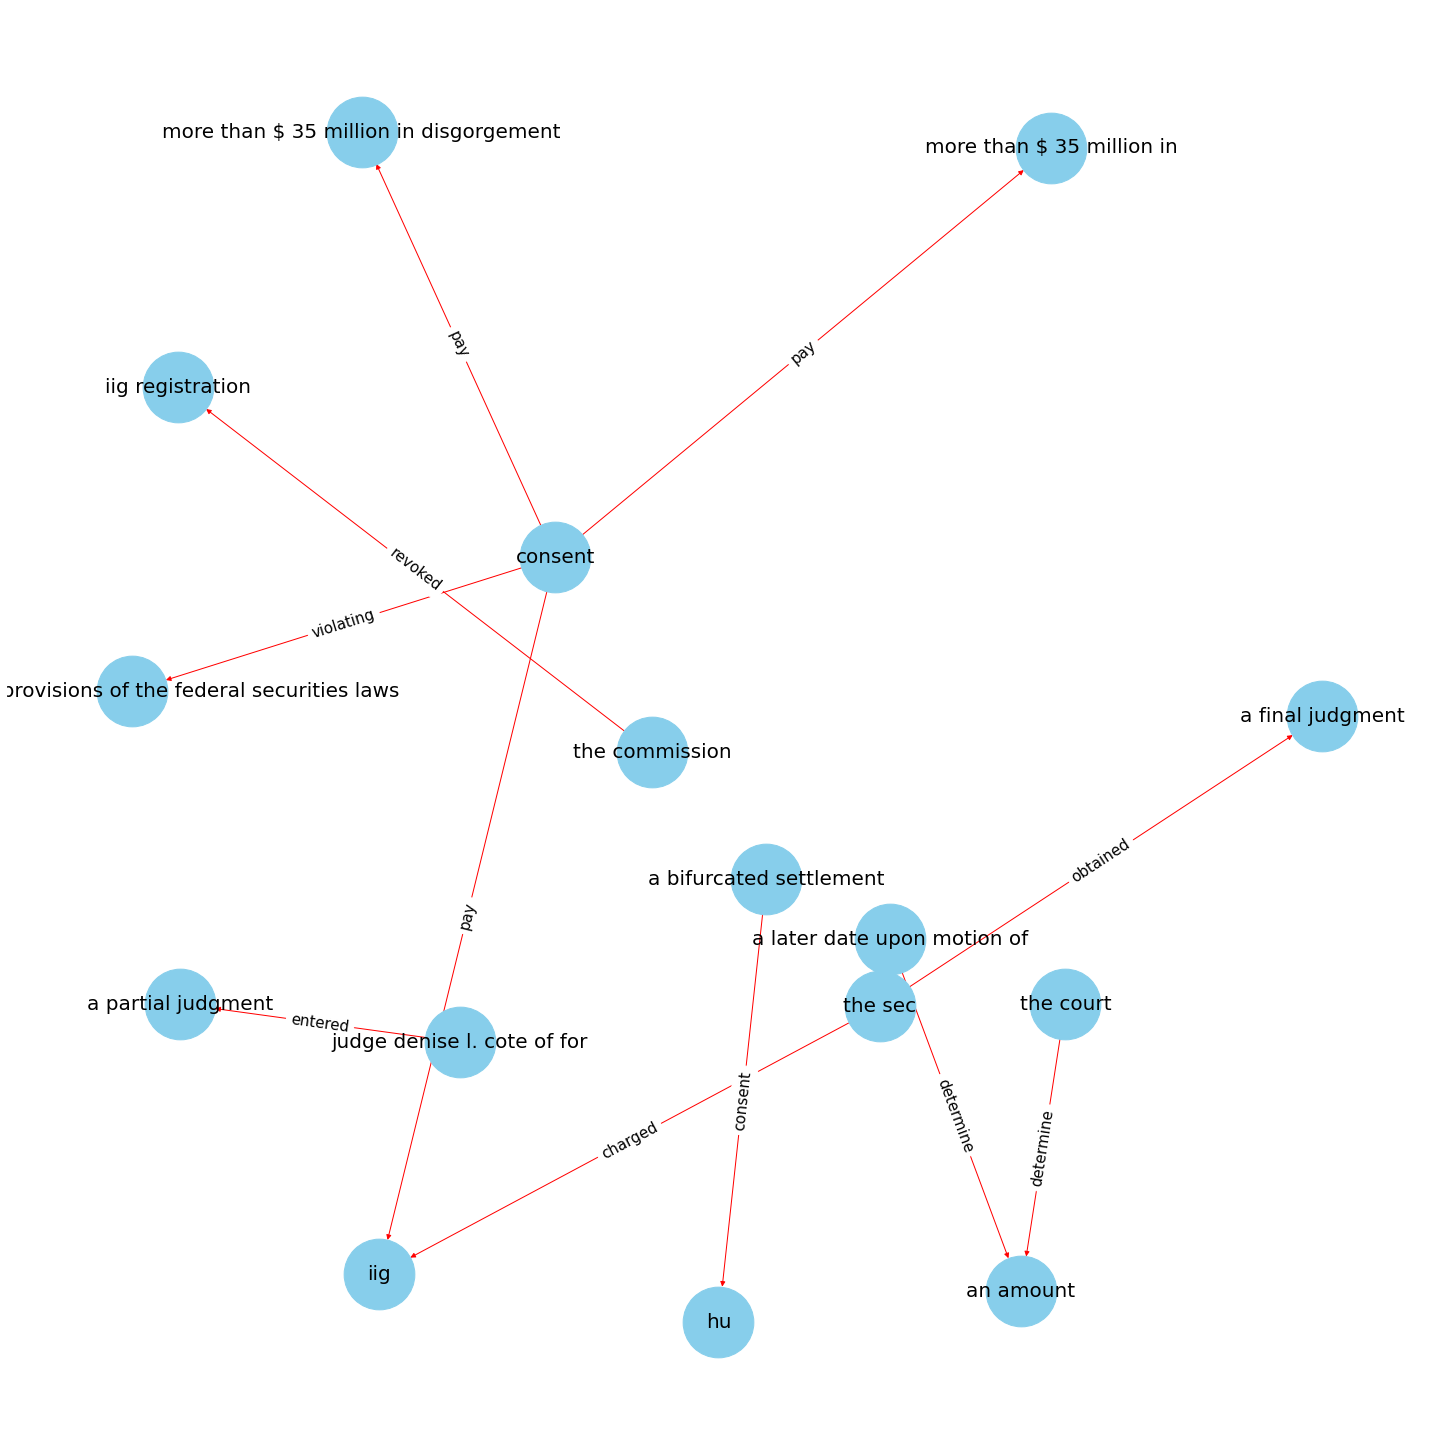

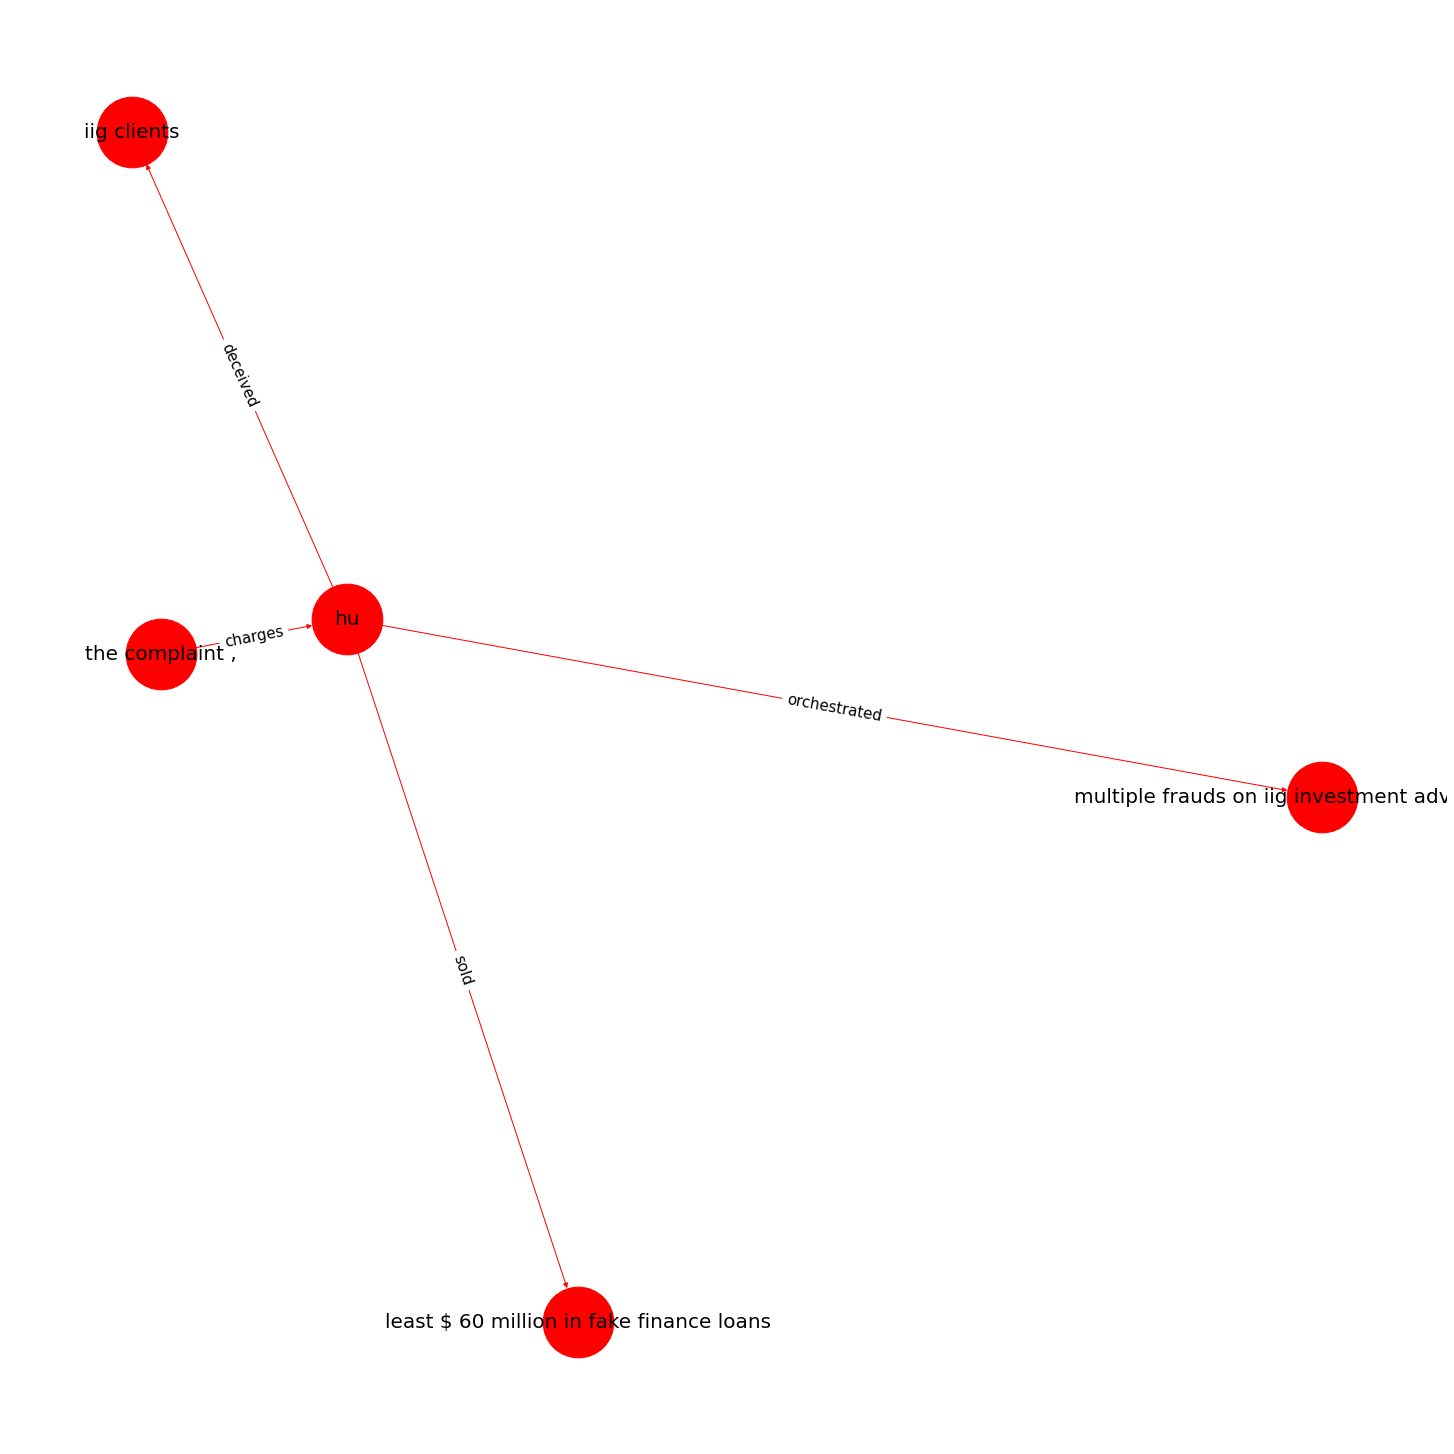

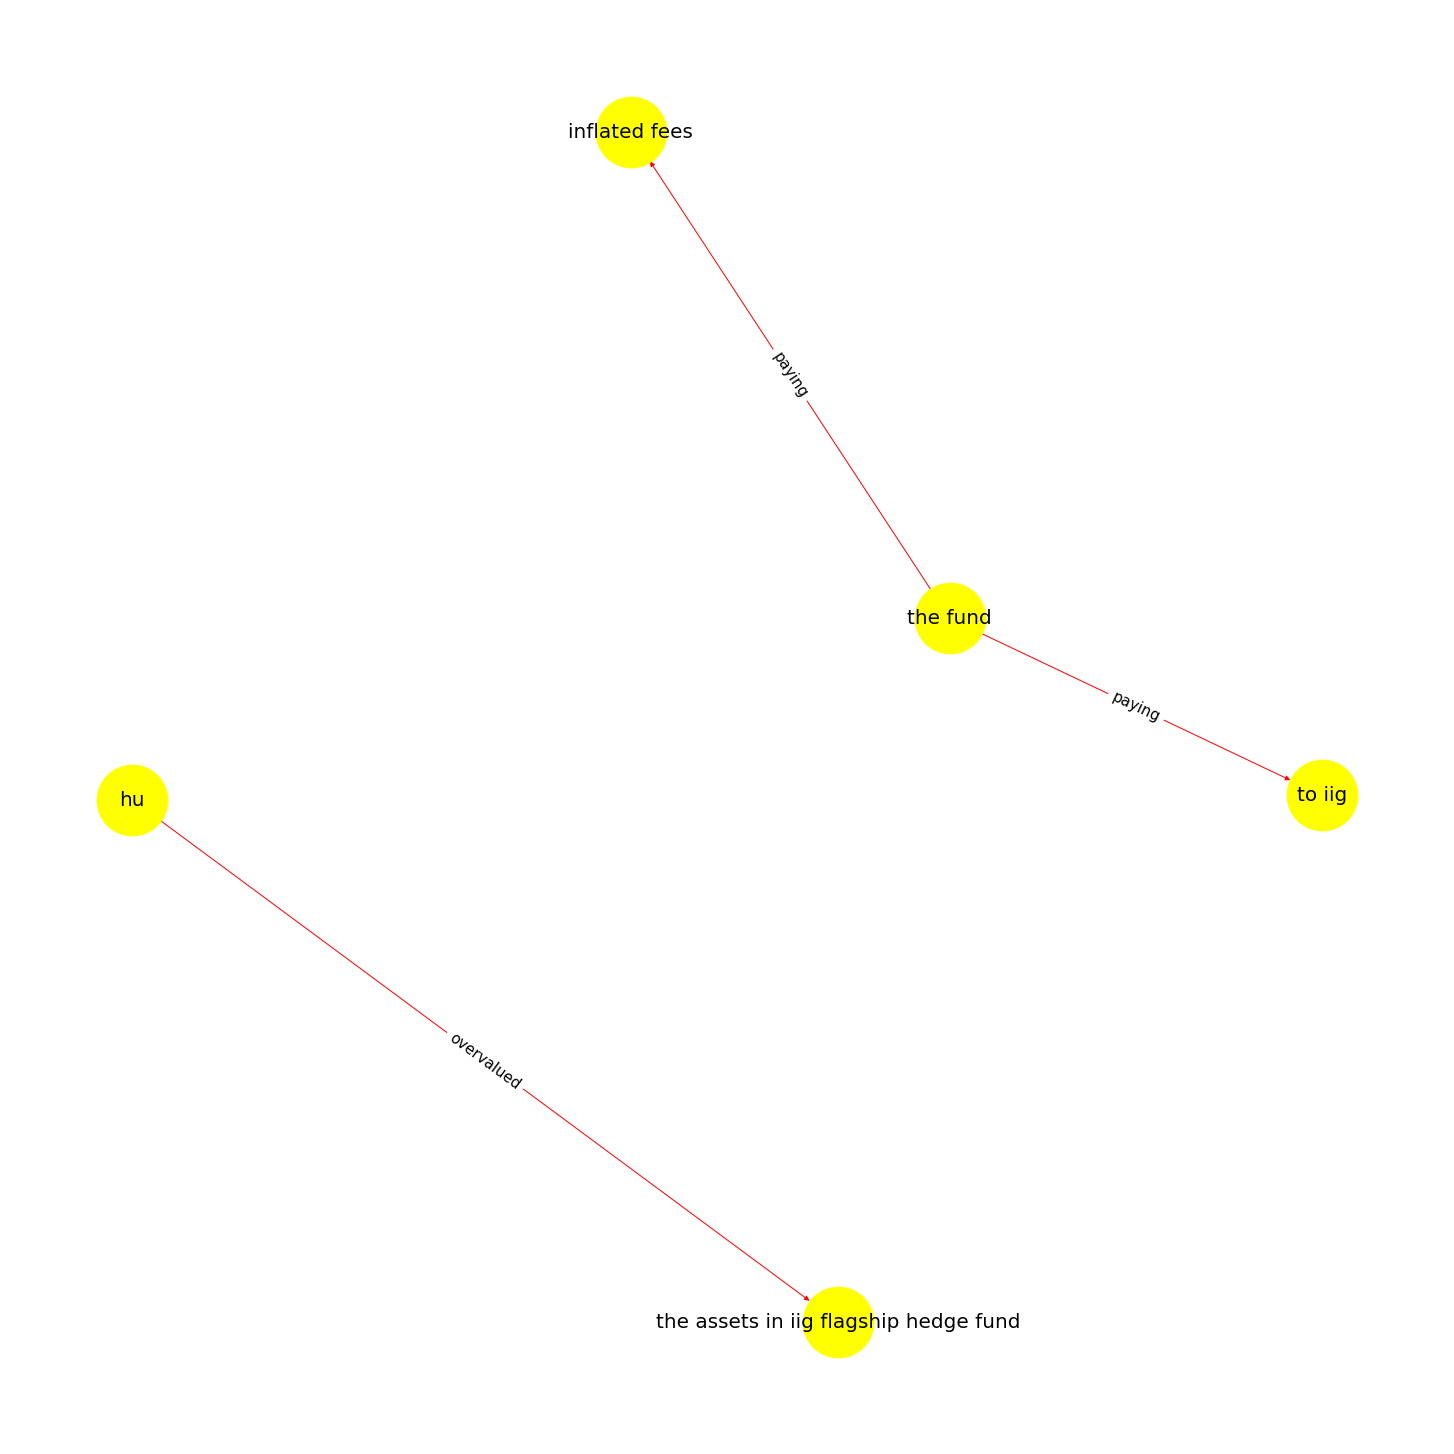

In [47]:
no_of_topics = 3
topics = get_topics('docs/text3.txt', no_of_topics)
cnt=-1

graphs = []
for i in topics:
    cnt+=1
    final_nodes = []
    nodes = []
    for sentence in topics[i]: 
        tokens = nlp(sentence)
        svos = findSVOs(tokens)
        nodes.append(svos)
    for i in nodes:
        for j in i:
            if(len(j) == 3):
                final_nodes.append(j)
    graphs.append(create_graph(final_nodes, cnt))
    name = str(time.time())
    plt.savefig('./images/' + name + '.png')


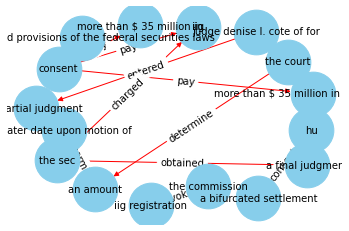

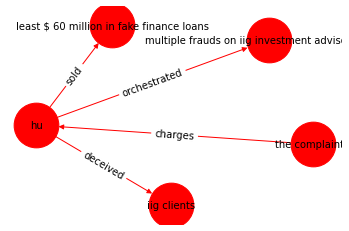

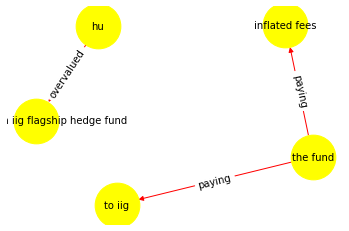

In [71]:
i=0
for graph in graphs:
    ax = plt.subplots()
    pos = nx.spring_layout(graph[0],k=10)
    nx.draw(graph[0], with_labels=True, node_color=colors[i], node_size=2000, edge_color='r', edge_cmap=plt.cm.Blues, pos=pos, font_size=10, ax=None)
    nx.draw_networkx_edge_labels(graph[0],pos,edge_labels=graph[1], font_size=10)
    i=i+1
